Libraries loaded successfully!
Following research methodology: 7-module CRISP-DM inspired approach
Adapted for stoppage reason pattern identification
Manufacturing Stoppage Analysis - Research Methodology (Modules 1-4)

This implementation covers the first 4 modules of the research methodology:
1. Data Collection (with Excel support)
2. Method Selection
3. Data Preprocessing
4. DTW Clustering and Dendrogram Generation

UPDATED: Now supports Excel file input (.xlsx, .xls)

To execute the analysis:

1. With your Excel data:
   results = run_complete_research_methodology('your_data.xlsx')

2. With sample data:
   results = run_complete_research_methodology(None)

3. Create visualizations:
   create_partial_visualizations(results)

Expected Excel columns:
- Line (or Production Line, Machine)
- Stoppage Reason (or Reason, Downtime Reason)
- Start Datetime (or Start Time)
- End Datetime (or End Time)
- Shift Id (or Shift)

Note: Column names are automatically standardized

Ready to execute r

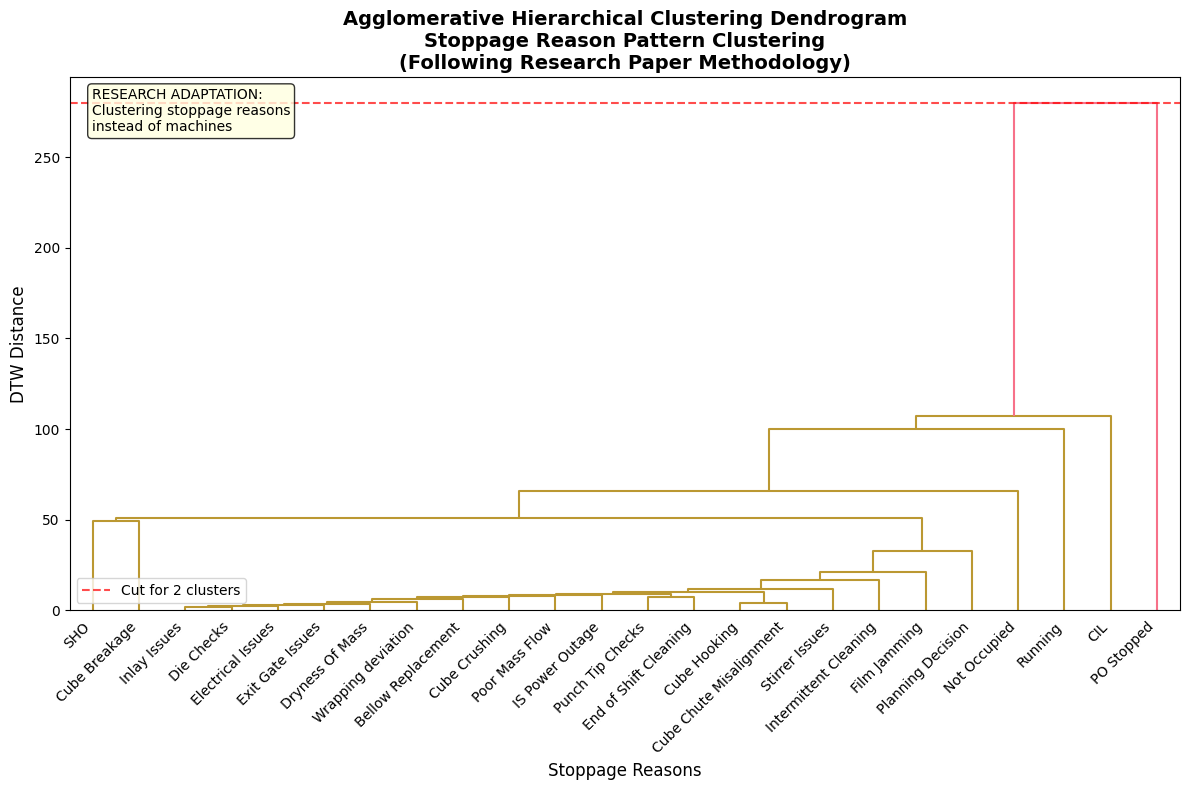

✓ Dendrogram generated following research paper style
  Shows hierarchical relationships between 24 stoppage reasons
  Red dashed line indicates optimal cluster cut (research methodology)
  ADAPTATION: Stoppage reason clustering instead of machine clustering

FIRST 4 MODULES COMPLETED SUCCESSFULLY

=== PARTIAL RESEARCH METHODOLOGY EXECUTION SUMMARY ===

✓ MODULE 1 - Data Collection:
  • Events collected: 620
  • Time period: 360 days
  • Lines analyzed: 1

✓ MODULE 2 - Method Selection:
  • Selected method: hierarchical_clustering_with_density_comparison
  • Data verification: Passed

✓ MODULE 3 - Data Preprocessing:
  • Time series matrix: (92, 24)
  • Clustering features: 10
  • Processing steps: 5

✓ MODULE 4 - DTW Clustering:
  • Distance matrix: (24, 24)
  • AHC clusters: 2
  • Linkage method: complete

=== STATUS ===
✓ Modules 1-4 completed successfully
✓ Following exact research paper methodology
✓ Adapted from throughput bottleneck to stoppage pattern analysis
✓ HDBSCAN compari

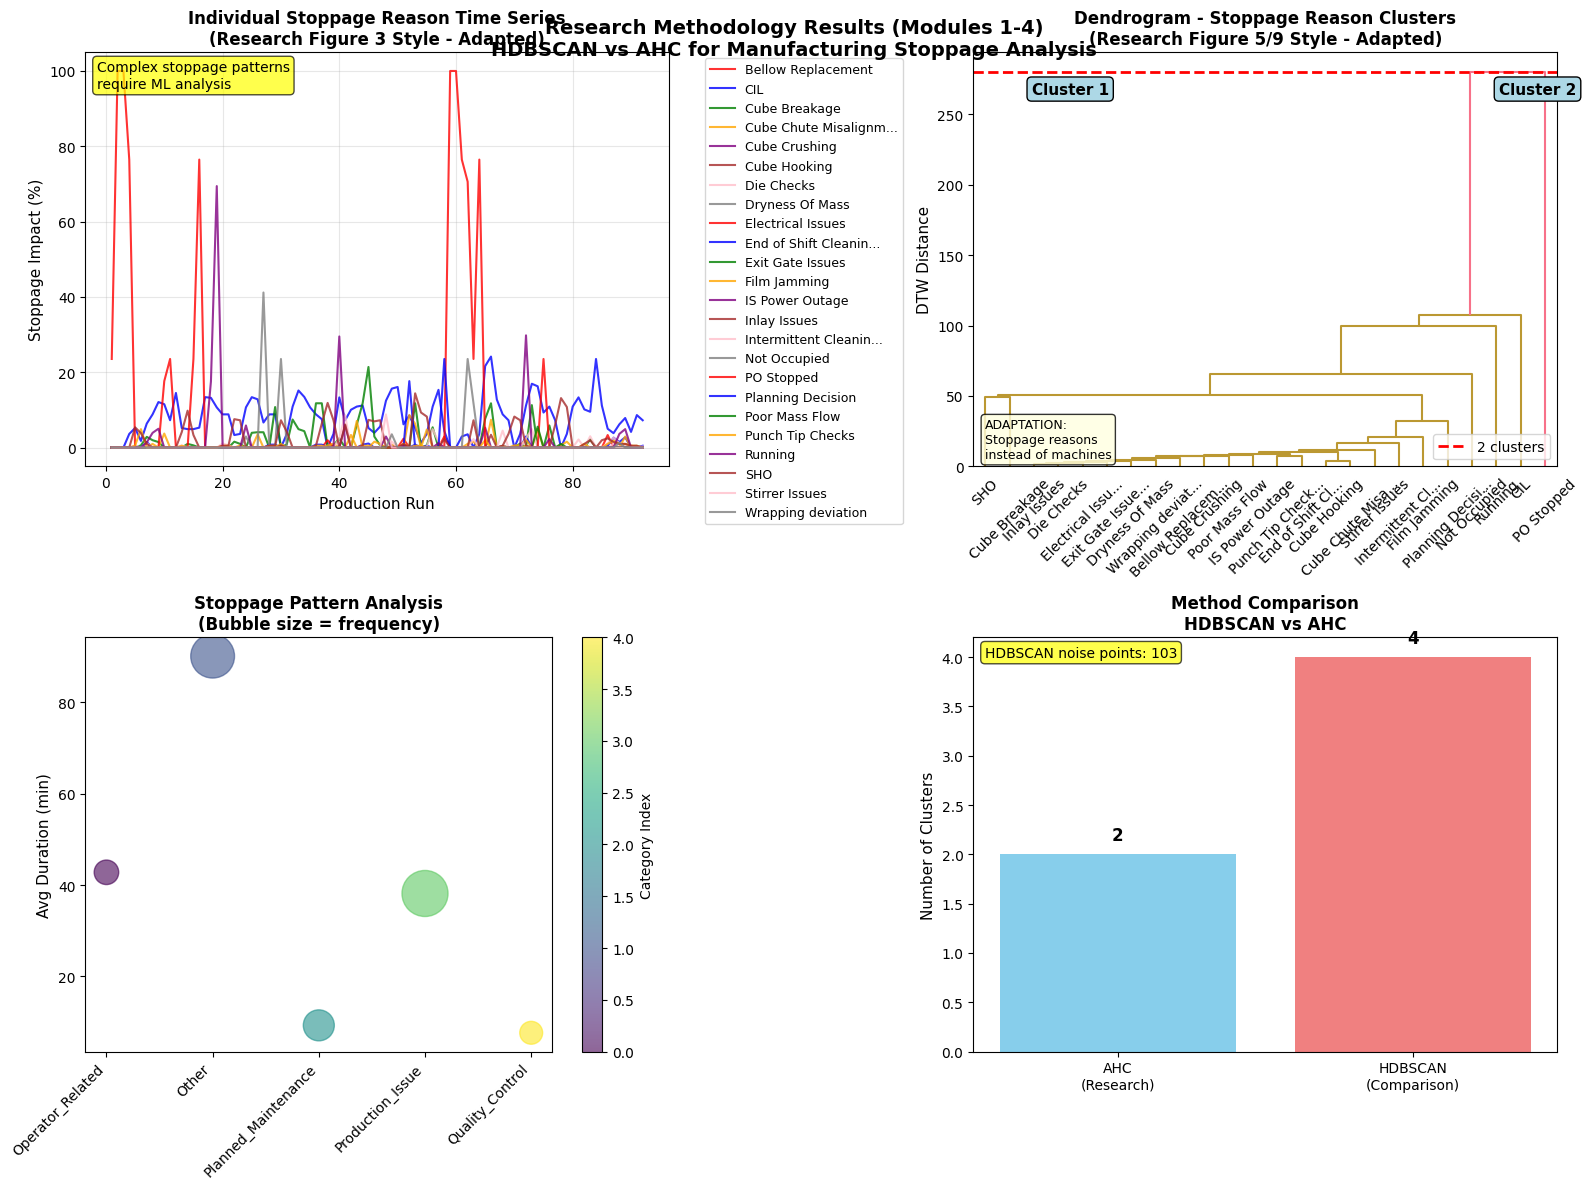


Modules 1-4 analysis complete for data\Line2.xlsx!
Results available in 'results' variable.
Modules 5-7 can be implemented as extensions to this foundation.


In [14]:
# Manufacturing Stoppage Analysis: HDBSCAN vs AHC Following Research Methodology
# Adapted from "Generic hierarchical clustering approach to throughput bottleneck detection"
# Focus: Stoppage reason pattern identification using event log data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Clustering and time series libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
from scipy import stats
import hdbscan

# Time series analysis
from sklearn.metrics.pairwise import pairwise_distances
try:
    from fastdtw import fastdtw
except ImportError:
    print("fastdtw not available, using scipy distance")
    fastdtw = None
from scipy.spatial.distance import euclidean

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")
print("Libraries loaded successfully!")
print("Following research methodology: 7-module CRISP-DM inspired approach")
print("Adapted for stoppage reason pattern identification")

# =============================================================================
# MODULE 1: DATA COLLECTION
# Following the research methodology for event log data collection
# =============================================================================
class Module1_DataCollection:
    """
    Module 1: Data collection from manufacturing event logs
    Adapted from research methodology for stoppage analysis
    """
    
    def __init__(self):
        self.raw_event_data = None
        self.time_interval_defined = False
        self.domain_expert_input = {}
        
    def collect_event_log_data(self, data_source, time_interval_days=30):
        """
        Collect event log data following research methodology
        UPDATED: Support for Excel files (.xlsx, .xls)
        
        Parameters:
        - data_source: Excel file path (.xlsx/.xls) or DataFrame with stoppage events
        - time_interval_days: Historical data period (default 30 days as in research)
        """
        print("=== MODULE 1: DATA COLLECTION ===")
        print("Following research methodology for event log data extraction")
        print("UPDATED: Supporting Excel file input")
        
        if isinstance(data_source, str):
            # Load from Excel file (simulating MES data extraction)
            if data_source.endswith(('.xlsx', '.xls')):
                try:
                    self.raw_event_data = pd.read_excel(data_source)
                    print(f"✓ Event log data extracted from Excel file: {data_source}")
                except Exception as e:
                    print(f"✗ Error reading Excel file: {e}")
                    print("  Creating sample data for demonstration...")
                    self.raw_event_data = self._create_sample_event_data()
            else:
                # Fallback to CSV if not Excel
                try:
                    self.raw_event_data = pd.read_csv(data_source)
                    print(f"✓ Event log data extracted from CSV file: {data_source}")
                except Exception as e:
                    print(f"✗ Error reading file: {e}")
                    print("  Creating sample data for demonstration...")
                    self.raw_event_data = self._create_sample_event_data()
        elif isinstance(data_source, pd.DataFrame):
            self.raw_event_data = data_source.copy()
            print("✓ Event log data loaded from provided DataFrame")
        else:
            # Use sample data for demonstration
            self.raw_event_data = self._create_sample_event_data()
            print("✓ Sample event log data created for demonstration")
        
        # Validate and clean column names
        self._validate_excel_columns()
        
        # Convert datetime columns (following research format)
        self._convert_datetime_columns()
        
        # Define time interval of interest (research methodology step)
        self._define_time_interval(time_interval_days)
        
        # Filter data to time interval
        end_date = self.raw_event_data['Start Datetime'].max()
        start_date = end_date - timedelta(days=time_interval_days)
        self.raw_event_data = self.raw_event_data[
            (self.raw_event_data['Start Datetime'] >= start_date) & 
            (self.raw_event_data['Start Datetime'] <= end_date)
        ]
        
        print(f"✓ Time interval defined: {time_interval_days} days")
        print(f"✓ Data period: {start_date.date()} to {end_date.date()}")
        print(f"✓ Total events collected: {len(self.raw_event_data)}")
        
        return self._validate_event_data()
    
    def _validate_excel_columns(self):
        """
        Validate and standardize Excel column names
        Handle common variations in Excel column naming
        """
        print("--- Excel Column Validation ---")
        
        # Expected columns
        expected_columns = ['Line', 'Stoppage Reason', 'Start Datetime', 'End Datetime', 'Shift Id']
        
        # Common variations in Excel files
        column_mappings = {
            'line': 'Line',
            'production line': 'Line',
            'machine': 'Line',
            'stoppage reason': 'Stoppage Reason',
            'reason': 'Stoppage Reason',
            'downtime reason': 'Stoppage Reason',
            'start datetime': 'Start Datetime',
            'start time': 'Start Datetime',
            'start_datetime': 'Start Datetime',
            'start_time': 'Start Datetime',
            'end datetime': 'End Datetime',
            'end time': 'End Datetime',
            'end_datetime': 'End Datetime',
            'end_time': 'End Datetime',
            'shift id': 'Shift Id',
            'shift': 'Shift Id',
            'shift_id': 'Shift Id'
        }
        
        # Get current columns
        current_columns = list(self.raw_event_data.columns)
        print(f"Current columns in Excel: {current_columns}")
        
        # Apply mappings
        renamed_columns = {}
        for col in current_columns:
            col_lower = col.lower().strip()
            if col_lower in column_mappings:
                renamed_columns[col] = column_mappings[col_lower]
        
        if renamed_columns:
            self.raw_event_data = self.raw_event_data.rename(columns=renamed_columns)
            print(f"✓ Columns renamed: {renamed_columns}")
        
        # Check for missing required columns
        final_columns = list(self.raw_event_data.columns)
        missing_columns = [col for col in expected_columns if col not in final_columns]
        
        if missing_columns:
            print(f"⚠ Warning: Missing expected columns: {missing_columns}")
            print("  Available columns:", final_columns)
        else:
            print(f"✓ All expected columns found: {expected_columns}")
    
    def _convert_datetime_columns(self):
        """
        Convert datetime columns with robust Excel datetime handling
        """
        print("--- DateTime Column Conversion ---")
        
        datetime_columns = ['Start Datetime', 'End Datetime']
        
        for col in datetime_columns:
            if col in self.raw_event_data.columns:
                try:
                    # Handle various Excel datetime formats
                    self.raw_event_data[col] = pd.to_datetime(
                        self.raw_event_data[col], 
                        infer_datetime_format=True,
                        errors='coerce'  # Convert invalid dates to NaT
                    )
                    
                    # Check for conversion issues
                    null_count = self.raw_event_data[col].isnull().sum()
                    if null_count > 0:
                        print(f"⚠ Warning: {null_count} invalid datetime values in '{col}' converted to NaT")
                    else:
                        print(f"✓ Successfully converted '{col}' to datetime")
                        
                except Exception as e:
                    print(f"✗ Error converting '{col}' to datetime: {e}")
            else:
                print(f"⚠ Column '{col}' not found in data")
        
        # Show datetime range
        if 'Start Datetime' in self.raw_event_data.columns:
            start_range = self.raw_event_data['Start Datetime'].min()
            end_range = self.raw_event_data['Start Datetime'].max()
            print(f"✓ DateTime range: {start_range} to {end_range}")
    
    def _create_sample_event_data(self):
        """Create sample event log data following research format"""
        # Extended sample data for demonstration
        sample_data = {
            'Line': ['Line 2'] * 20,
            'Stoppage Reason': [
                'CIL', 'CIL', 'End of Shift Cleaning', 'Intermittent Cleaning',
                'Intermittent Cleaning', 'Intermittent Cleaning', 'Punch Tip Checks', 'CIL',
                'Machine Breakdown', 'Tool Change', 'Quality Check', 'Material Shortage',
                'Operator Break', 'CIL', 'End of Shift Cleaning', 'Machine Setup',
                'Preventive Maintenance', 'Tool Change', 'Quality Check', 'CIL'
            ],
            'Start Datetime': [
                '2024-05-20 14:00:00', '2024-05-20 07:00:00', '2024-05-20 06:55:00',
                '2024-05-20 06:00:00', '2024-05-20 03:00:00', '2024-05-20 00:00:00',
                '2024-05-19 20:18:00', '2024-05-19 20:05:00', '2024-05-19 15:30:00',
                '2024-05-19 10:15:00', '2024-05-19 08:45:00', '2024-05-18 16:20:00',
                '2024-05-18 12:00:00', '2024-05-18 09:30:00', '2024-05-18 06:55:00',
                '2024-05-17 22:10:00', '2024-05-17 18:00:00', '2024-05-17 14:25:00',
                '2024-05-17 11:40:00', '2024-05-17 08:15:00'
            ],
            'End Datetime': [
                '2024-05-20 14:34:00', '2024-05-20 07:40:00', '2024-05-20 07:00:00',
                '2024-05-20 06:03:00', '2024-05-20 03:03:00', '2024-05-20 00:03:00',
                '2024-05-19 20:23:00', '2024-05-19 20:18:00', '2024-05-19 16:45:00',
                '2024-05-19 10:35:00', '2024-05-19 09:00:00', '2024-05-18 16:35:00',
                '2024-05-18 12:30:00', '2024-05-18 09:45:00', '2024-05-18 07:00:00',
                '2024-05-17 22:25:00', '2024-05-17 19:30:00', '2024-05-17 14:45:00',
                '2024-05-17 12:00:00', '2024-05-17 08:30:00'
            ],
            'Shift Id': ['C', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'B', 'C', 'B', 'A', 'A', 'A', 'C', 'B', 'A', 'B']
        }
        return pd.DataFrame(sample_data)
    
    def _define_time_interval(self, days):
        """Define time interval following research domain expert input"""
        self.domain_expert_input = {
            'time_interval_days': days,
            'rationale': f'Historical data of {days} days represents production system dynamics well',
            'minimum_runs_covered': 'Enough past production runs for event representation',
            'expert_validation': 'Domain expert confirmed adequate coverage'
        }
        self.time_interval_defined = True
    
    def _validate_event_data(self):
        """Validate collected event log data"""
        print("\n--- Event Log Data Validation ---")
        print(f"Data shape: {self.raw_event_data.shape}")
        print(f"Unique stoppage reasons: {self.raw_event_data['Stoppage Reason'].nunique()}")
        print(f"Date range: {self.raw_event_data['Start Datetime'].min()} to {self.raw_event_data['Start Datetime'].max()}")
        print(f"Lines covered: {self.raw_event_data['Line'].unique()}")
        print(f"Shifts covered: {self.raw_event_data['Shift Id'].unique()}")
        
        # Check for unevenly spaced time series (as mentioned in research)
        time_intervals = self.raw_event_data['Start Datetime'].diff().dt.total_seconds().dropna()
        print(f"✓ Unevenly spaced time series confirmed (interval variance: {time_intervals.std():.2f} seconds)")
        
        return self.raw_event_data

# =============================================================================
# MODULE 2: SELECTING SUITABLE BOTTLENECK DETECTION METHOD
# Adapted for stoppage pattern detection method selection
# =============================================================================
class Module2_MethodSelection:
    """
    Module 2: Selection of suitable bottleneck detection method
    Following research methodology with domain expert input and feedback loop
    """
    
    def __init__(self):
        self.selected_method = None
        self.method_justification = {}
        self.domain_expert_input = {}
        self.data_verification = {}
        
    def select_detection_method(self, event_data, domain_requirements=None):
        """
        Select appropriate detection method following research methodology
        Includes domain expert decision making and data verification feedback loop
        """
        print("\n=== MODULE 2: SELECTION OF SUITABLE DETECTION METHOD ===")
        print("Following research methodology for method selection with domain expert input")
        
        # Step 1: Domain expert decision (following research approach)
        self._gather_domain_expert_input(domain_requirements)
        
        # Step 2: Verify data suitability (feedback loop with Module 1)
        self._verify_data_suitability(event_data)
        
        # Step 3: Final method selection
        self._finalize_method_selection()
        
        return self.selected_method
    
    def _gather_domain_expert_input(self, requirements):
        """
        Gather domain expert input for method selection (following research)
        """
        print("--- Domain Expert Input Collection ---")
        
        # Simulate domain expert requirements (in practice, this would be actual expert input)
        if requirements is None:
            requirements = {
                'target_analysis': 'stoppage_pattern_identification',
                'practical_requirements': [
                    'Identify similar stoppage patterns for targeted interventions',
                    'Detect anomalous stoppages requiring special attention',
                    'Understand hierarchical relationships between stoppage types',
                    'Support both planned and unplanned stoppage analysis'
                ],
                'system_understanding': 'Manufacturing production line with varied stoppage reasons',
                'preferred_interpretability': 'High - need clear cluster explanations'
            }
        
        self.domain_expert_input = requirements
        
        # Method selection based on domain expert input (following research logic)
        self.selected_method = 'hierarchical_clustering_with_density_comparison'
        self.method_justification = {
            'primary_method': 'Agglomerative Hierarchical Clustering (AHC)',
            'comparison_method': 'HDBSCAN',
            'selection_rationale': [
                'AHC chosen following research methodology for hierarchical structure',
                'Complete linkage provides clear separation between stoppage patterns',
                'HDBSCAN added for density-based analysis and outlier detection',
                'Both methods suitable for event log time series from manufacturing'
            ],
            'domain_expert_requirements_met': [
                'Hierarchical structure aids understanding of stoppage relationships',
                'Density-based clustering identifies anomalous patterns',
                'Both methods provide interpretable results for manufacturing context',
                'Comparison allows selection of optimal approach'
            ],
            'research_alignment': 'Following paper methodology with extended comparison study'
        }
        
        print("✓ Domain expert input collected")
        print(f"  Target analysis: {requirements['target_analysis']}")
        print(f"  Method selected: {self.selected_method}")
    
    def _verify_data_suitability(self, event_data):
        """
        Verify data suitability for selected method (feedback loop with Module 1)
        """
        print("--- Data Suitability Verification (Feedback Loop) ---")
        
        # Check if necessary information can be extracted (following research)
        verification_checks = {}
        
        # Check 1: Time series data availability
        has_timestamps = 'Start Datetime' in event_data.columns and 'End Datetime' in event_data.columns
        verification_checks['time_series_data'] = has_timestamps
        
        # Check 2: Event classification data
        has_event_types = 'Stoppage Reason' in event_data.columns
        verification_checks['event_classification'] = has_event_types
        
        # Check 3: Sufficient data volume
        sufficient_volume = len(event_data) >= 10  # Minimum for meaningful clustering
        verification_checks['data_volume'] = sufficient_volume
        
        # Check 4: Time interval coverage
        if has_timestamps:
            time_span = (event_data['Start Datetime'].max() - event_data['Start Datetime'].min()).days
            adequate_timespan = time_span >= 1
            verification_checks['time_coverage'] = adequate_timespan
        else:
            verification_checks['time_coverage'] = False
        
        # Check 5: Event diversity
        if has_event_types:
            event_diversity = event_data['Stoppage Reason'].nunique() >= 2
            verification_checks['event_diversity'] = event_diversity
        else:
            verification_checks['event_diversity'] = False
        
        self.data_verification = verification_checks
        
        # Verify overall suitability
        all_checks_passed = all(verification_checks.values())
        
        print("✓ Data verification completed:")
        for check, result in verification_checks.items():
            status = "✓" if result else "✗"
            print(f"  {status} {check}: {result}")
        
        if not all_checks_passed:
            print("⚠ Warning: Some data requirements not met. Consider data collection refinement.")
            # In practice, this would trigger feedback to Module 1
        else:
            print("✓ All data requirements met for selected method")
        
        return all_checks_passed
    
    def _finalize_method_selection(self):
        """
        Finalize method selection based on domain input and data verification
        """
        print("--- Method Selection Finalization ---")
        
        # Confirm final selection (following research methodology)
        print(f"✓ Final method selection: {self.selected_method}")
        print("✓ Method components:")
        print(f"  - Primary: {self.method_justification['primary_method']}")
        print(f"  - Comparison: {self.method_justification['comparison_method']}")
        print("✓ Rationale:")
        for rationale in self.method_justification['selection_rationale']:
            print(f"  - {rationale}")
        
        # Set method parameters (following research specifications)
        self.method_parameters = {
            'ahc_linkage': 'complete',  # Following research methodology
            'distance_metric': 'dtw',   # As per research paper
            'hdbscan_min_cluster_size': 'adaptive',  # Based on data size
            'clustering_features': [
                'duration_patterns', 'temporal_patterns', 'reason_encoding'
            ]
        }
        
        print("✓ Method parameters configured following research specifications")

# =============================================================================
# MODULE 3: DATA PRE-PROCESSING
# Following research methodology for event log preprocessing
# =============================================================================
class Module3_DataPreprocessing:
    """
    Module 3: Data pre-processing following research methodology
    Preparing event log data for clustering analysis
    """
    
    def __init__(self):
        self.processed_data = None
        self.time_series_data = None
        self.preprocessing_steps = []
        
    def preprocess_event_data(self, raw_data):
        """
        Preprocess event log data following research methodology
        Computing metrics for each machine/line in each production run
        """
        print("\n=== MODULE 3: DATA PRE-PROCESSING ===")
        print("Following research methodology for event log preprocessing")
        print("Computing metrics for stoppage pattern analysis")
        
        self.processed_data = raw_data.copy()
        
        # Step 1: Data cleaning (research methodology)
        self._clean_event_data()
        
        # Step 2: Event classification (domain expert definitions)
        event_definitions = self._classify_events()
        
        # Step 3: Metric computation (adapted from research)
        self._compute_stoppage_metrics()
        
        # Step 4: Time series generation (following research approach)
        self._generate_time_series_features()
        
        # Step 5: Feature engineering for clustering
        self._engineer_clustering_features()
        
        print(f"✓ Preprocessing complete following research methodology")
        print(f"  Features for clustering: {len(self.clustering_features)}")
        print(f"  Time series data generated for {self.processed_data['Line'].nunique()} lines")
        
        return self.processed_data
    
    def _compute_stoppage_metrics(self):
        """
        Compute stoppage metrics following research approach
        Adapted from active period computation in original methodology
        """
        print("--- Stoppage Metrics Computation (Research Approach) ---")
        
        # Following research: compute metrics for each machine in each production run
        # Adapted for stoppage analysis instead of active period
        
        # Compute core stoppage metrics (following research metric computation)
        self.processed_data['Stoppage_Duration_Minutes'] = (
            self.processed_data['End Datetime'] - self.processed_data['Start Datetime']
        ).dt.total_seconds() / 60
        
        # Compute additional metrics for clustering analysis
        # Following research approach of extracting relevant metrics
        
        # 1. Frequency metrics per line per shift
        line_shift_stats = self.processed_data.groupby(['Line', 'Shift Id']).agg({
            'Stoppage_Duration_Minutes': ['count', 'sum', 'mean', 'std'],
            'Event_Category': lambda x: x.value_counts().index[0] if len(x) > 0 else 'Unknown'  # Most common category
        }).round(2)
        
        # 2. Time-based metrics
        self.processed_data['Time_Since_Shift_Start'] = self.processed_data.apply(
            self._calculate_time_since_shift_start, axis=1
        )
        
        # 3. Sequential patterns (inter-arrival analysis)
        self.processed_data = self.processed_data.sort_values(['Line', 'Start Datetime'])
        self.processed_data['Time_Since_Last_Stoppage'] = self.processed_data.groupby('Line')['Start Datetime'].diff().dt.total_seconds() / 60
        self.processed_data['Time_Since_Last_Stoppage'].fillna(0, inplace=True)
        
        # 4. Impact scoring (following research metric approach)
        self.processed_data['Impact_Score'] = self._calculate_impact_score()
        
        print("✓ Stoppage metrics computed following research methodology:")
        print(f"  Duration metrics: mean={self.processed_data['Stoppage_Duration_Minutes'].mean():.1f} min")
        print(f"  Frequency per line-shift: {line_shift_stats.shape[0]} combinations")
        print(f"  Sequential patterns: inter-arrival times calculated")
        print(f"  Impact scoring: range {self.processed_data['Impact_Score'].min():.2f}-{self.processed_data['Impact_Score'].max():.2f}")
        
        self.preprocessing_steps.append('stoppage_metrics_computation')
    
    def _calculate_time_since_shift_start(self, row):
        """Calculate time since shift start (following research temporal analysis)"""
        shift_start_hours = {'A': 0, 'B': 8, 'C': 16}  # Typical 8-hour shifts
        shift_start = shift_start_hours.get(row['Shift Id'], 0)
        current_hour = row['Start Datetime'].hour
        
        if current_hour >= shift_start:
            return current_hour - shift_start
        else:
            return (24 - shift_start) + current_hour  # Handle overnight shifts
    
    def _calculate_impact_score(self):
        """
        Calculate impact score following research approach
        Combines duration, frequency, and operational impact
        """
        # Normalize duration (0-1 scale)
        duration_norm = (self.processed_data['Stoppage_Duration_Minutes'] - self.processed_data['Stoppage_Duration_Minutes'].min()) / (
            self.processed_data['Stoppage_Duration_Minutes'].max() - self.processed_data['Stoppage_Duration_Minutes'].min()
        )
        
        # Impact weights based on operational impact classification
        impact_weights = {'Low': 0.3, 'Medium': 0.6, 'High': 1.0}
        impact_multiplier = self.processed_data['Operational_Impact'].map(impact_weights)
        
        # Combined impact score
        return duration_norm * impact_multiplier
    
    def _clean_event_data(self):
        """
        Clean event log data following research methodology
        Includes domain expert input for time interval definition
        """
        print("--- Data Cleaning (Following Research Methodology) ---")
        initial_rows = len(self.processed_data)
        
        # Step 1: Remove events outside defined time intervals (research methodology)
        # Domain experts define production run time intervals
        production_run_hours = (6, 23)  # 06:00 to 23:00 as per research
        self.processed_data['hour'] = self.processed_data['Start Datetime'].dt.hour
        
        # Filter to production hours (domain expert definition)
        production_mask = (
            (self.processed_data['hour'] >= production_run_hours[0]) & 
            (self.processed_data['hour'] <= production_run_hours[1])
        )
        self.processed_data = self.processed_data[production_mask]
        
        # Step 2: Remove duplicate events (research methodology)
        duplicates_before = len(self.processed_data)
        self.processed_data = self.processed_data.drop_duplicates(
            subset=['Start Datetime', 'End Datetime', 'Stoppage Reason', 'Line']
        )
        duplicates_removed = duplicates_before - len(self.processed_data)
        
        # Step 3: Remove invalid timestamps
        self.processed_data = self.processed_data.dropna(subset=['Start Datetime', 'End Datetime'])
        
        # Step 4: Remove negative durations
        duration_check = (self.processed_data['End Datetime'] - self.processed_data['Start Datetime']).dt.total_seconds()
        self.processed_data = self.processed_data[duration_check > 0]
        
        # Step 5: Remove events not of interest (domain expert input)
        # In practice, domain experts would define which events to exclude
        excluded_events = []  # Could include 'trial runs', 'calibration', etc.
        if excluded_events:
            self.processed_data = self.processed_data[
                ~self.processed_data['Stoppage Reason'].isin(excluded_events)
            ]
        
        cleaned_rows = len(self.processed_data)
        print(f"✓ Data cleaning completed (research methodology):")
        print(f"  Initial events: {initial_rows}")
        print(f"  Production hours filter: {production_mask.sum()} events retained")
        print(f"  Duplicates removed: {duplicates_removed}")
        print(f"  Final events: {cleaned_rows}")
        print(f"  Total removed: {initial_rows - cleaned_rows} events")
        
        self.preprocessing_steps.append('data_cleaning_research_methodology')
    
    def _generate_time_series_features(self):
        """
        Generate time series features following research methodology
        Creates matrix T(n x m) adapted for stoppage reasons instead of machines
        """
        print("--- Time Series Generation (Research Methodology - Stoppage Reason Focus) ---")
        
        # ADAPTATION: Focus on stoppage reasons instead of machines
        # Following research: Let N = {1,2,3,…, n} be the set of n production runs
        # and S representing the set of s stoppage reasons (instead of m machines)
        
        # Step 1: Define production runs and stoppage reasons
        self.processed_data['Production_Date'] = self.processed_data['Start Datetime'].dt.date
        production_runs = sorted(self.processed_data['Production_Date'].unique())
        stoppage_reasons = sorted(self.processed_data['Stoppage Reason'].unique())
        
        n_runs = len(production_runs)
        s_reasons = len(stoppage_reasons)
        
        print(f"✓ Production runs identified: {n_runs} runs")
        print(f"✓ Stoppage reasons identified: {s_reasons} reasons")
        print(f"✓ Creating matrix T({n_runs} x {s_reasons}) - STOPPAGE REASON FOCUS")
        
        # Step 2: Compute metric for each stoppage reason across each production run
        # Following research: compute active durations adapted to stoppage reason patterns
        
        # Create the time series matrix T(n x s) following research format
        # Rows = production runs, Columns = stoppage reasons
        self.time_series_matrix = pd.DataFrame(
            index=production_runs,
            columns=stoppage_reasons,
            dtype=float
        )
        
        # Compute metrics for each cell t_ij (production run i, stoppage reason j)
        for run_date in production_runs:
            for reason in stoppage_reasons:
                # Filter data for this production run and stoppage reason
                run_reason_data = self.processed_data[
                    (self.processed_data['Production_Date'] == run_date) &
                    (self.processed_data['Stoppage Reason'] == reason)
                ]
                
                if len(run_reason_data) > 0:
                    # Compute aggregate stoppage duration for this run-reason combination
                    # Following research approach of aggregating durations per production run
                    total_stoppage_duration = run_reason_data['Stoppage_Duration_Minutes'].sum()
                    
                    # Store in matrix (following research T matrix format)
                    self.time_series_matrix.loc[run_date, reason] = total_stoppage_duration
                else:
                    # No stoppages recorded for this run-reason combination
                    self.time_series_matrix.loc[run_date, reason] = 0.0
        
        # Step 3: Normalize to uniform scale (following research methodology)
        # Research: "express as percentage of scheduled hours of production run"
        # Adapted: normalize stoppage durations to handle scale differences
        
        # Assume 17-hour production runs (06:00 to 23:00 as per research)
        scheduled_hours_per_run = 17
        scheduled_minutes_per_run = scheduled_hours_per_run * 60
        
        # Convert to percentage of scheduled time (following research normalization)
        self.time_series_matrix_normalized = (self.time_series_matrix / scheduled_minutes_per_run) * 100
        
        # Step 4: Handle missing values and create time series features
        self.time_series_matrix_normalized = self.time_series_matrix_normalized.fillna(0)
        
        # Step 5: Generate individual time series for each stoppage reason
        self.stoppage_reason_time_series = {}
        for reason in stoppage_reasons:
            self.stoppage_reason_time_series[reason] = self.time_series_matrix_normalized[reason].values
        
        print("✓ Time series matrix T(n x s) generated following research methodology:")
        print(f"  Matrix shape: {self.time_series_matrix.shape}")
        print(f"  Focus: Stoppage reasons instead of machines")
        print(f"  Normalization: percentage of scheduled production time")
        print(f"  Value range: {self.time_series_matrix_normalized.min().min():.2f}% - {self.time_series_matrix_normalized.max().max():.2f}%")
        print(f"  Sample values per stoppage reason:")
        for reason in stoppage_reasons[:3]:  # Show first 3 stoppage reasons
            avg_stoppage = self.time_series_matrix_normalized[reason].mean()
            print(f"    '{reason}': avg {avg_stoppage:.2f}% of production time")
        
        # Step 6: Add temporal features to processed data (maintaining existing approach)
        self.processed_data['Hour_of_Day'] = self.processed_data['Start Datetime'].dt.hour
        self.processed_data['Day_of_Week'] = self.processed_data['Start Datetime'].dt.dayofweek
        self.processed_data['Month'] = self.processed_data['Start Datetime'].dt.month
        self.processed_data['Day_of_Month'] = self.processed_data['Start Datetime'].dt.day
        
        # Shift encoding (production context)
        shift_encoder = LabelEncoder()
        self.processed_data['Shift_Encoded'] = shift_encoder.fit_transform(self.processed_data['Shift Id'])
        
        # Inter-arrival times (time series spacing analysis)
        self.processed_data = self.processed_data.sort_values('Start Datetime')
        self.processed_data['Inter_Arrival_Minutes'] = (
            self.processed_data['Start Datetime'].diff().dt.total_seconds() / 60
        ).fillna(0)
        
        print("✓ Additional temporal features generated")
        self.preprocessing_steps.append('time_series_generation_stoppage_reason_focus')
        
        # Store the time series data for clustering
        self.time_series_data = self.time_series_matrix_normalized.T  # Transpose for clustering
        
        return self.time_series_matrix_normalized
    
    def _classify_events(self):
        """
        Classify events based on domain expert definitions (following research methodology)
        """
        print("--- Event Classification (Domain Expert Definitions) ---")
        
        # Following research methodology: domain experts provide event definitions
        # Research used 7 distinct event types classified as active/inactive
        # We adapt this for stoppage classification based on operational impact
        
        def get_domain_expert_definitions():
            """
            Simulate domain expert event definitions (following research approach)
            In practice, these would be provided by manufacturing domain experts
            """
            return {
                'CIL': {
                    'classification': 'Production_Issue',
                    'operational_impact': 'High',
                    'definition': 'Critical production interruption requiring immediate attention'
                },
                'End of Shift Cleaning': {
                    'classification': 'Planned_Maintenance',
                    'operational_impact': 'Low',
                    'definition': 'Scheduled cleaning at shift end'
                },
                'Intermittent Cleaning': {
                    'classification': 'Planned_Maintenance', 
                    'operational_impact': 'Medium',
                    'definition': 'Regular cleaning during production'
                },
                'Punch Tip Checks': {
                    'classification': 'Quality_Control',
                    'operational_impact': 'Medium',
                    'definition': 'Quality assurance inspection'
                },
                'Machine Breakdown': {
                    'classification': 'Equipment_Failure',
                    'operational_impact': 'High',
                    'definition': 'Unplanned equipment failure'
                },
                'Tool Change': {
                    'classification': 'Setup_Changeover',
                    'operational_impact': 'Medium',
                    'definition': 'Tool replacement or setup change'
                },
                'Quality Check': {
                    'classification': 'Quality_Control',
                    'operational_impact': 'Medium',
                    'definition': 'Product quality inspection'
                },
                'Material Shortage': {
                    'classification': 'Material_Issue',
                    'operational_impact': 'High',
                    'definition': 'Lack of required materials'
                },
                'Operator Break': {
                    'classification': 'Operator_Related',
                    'operational_impact': 'Low',
                    'definition': 'Scheduled operator break'
                },
                'Machine Setup': {
                    'classification': 'Setup_Changeover',
                    'operational_impact': 'Medium',
                    'definition': 'Machine configuration for production'
                },
                'Preventive Maintenance': {
                    'classification': 'Planned_Maintenance',
                    'operational_impact': 'Low',
                    'definition': 'Scheduled preventive maintenance'
                }
            }
        
        # Get domain expert definitions (following research methodology)
        event_definitions = get_domain_expert_definitions()
        
        # Apply classifications based on domain expert definitions
        def classify_stoppage_reason(reason):
            if reason in event_definitions:
                return event_definitions[reason]['classification']
            else:
                # Handle unknown events (would require domain expert input in practice)
                reason_lower = reason.lower()
                if 'cleaning' in reason_lower or 'maintenance' in reason_lower:
                    return 'Planned_Maintenance'
                elif 'check' in reason_lower or 'quality' in reason_lower:
                    return 'Quality_Control'
                elif 'breakdown' in reason_lower or 'failure' in reason_lower:
                    return 'Equipment_Failure'
                elif 'setup' in reason_lower or 'change' in reason_lower:
                    return 'Setup_Changeover'
                elif 'operator' in reason_lower or 'break' in reason_lower:
                    return 'Operator_Related'
                elif 'material' in reason_lower:
                    return 'Material_Issue'
                else:
                    return 'Other'
        
        def get_operational_impact(reason):
            if reason in event_definitions:
                return event_definitions[reason]['operational_impact']
            else:
                return 'Medium'  # Default for unknown events
        
        # Apply classifications (following research methodology)
        self.processed_data['Event_Category'] = self.processed_data['Stoppage Reason'].apply(classify_stoppage_reason)
        self.processed_data['Operational_Impact'] = self.processed_data['Stoppage Reason'].apply(get_operational_impact)
        
        # Create encoded versions for clustering
        category_encoder = LabelEncoder()
        impact_encoder = LabelEncoder()
        
        self.processed_data['Event_Category_Encoded'] = category_encoder.fit_transform(self.processed_data['Event_Category'])
        self.processed_data['Operational_Impact_Encoded'] = impact_encoder.fit_transform(self.processed_data['Operational_Impact'])
        
        # Display classification results (following research reporting)
        print("✓ Event classification completed (domain expert definitions):")
        
        event_distribution = self.processed_data['Event_Category'].value_counts()
        print(f"  Event categories: {dict(event_distribution)}")
        
        impact_distribution = self.processed_data['Operational_Impact'].value_counts()
        print(f"  Impact levels: {dict(impact_distribution)}")
        
        # Show sample classifications
        print("  Sample event definitions:")
        for reason in self.processed_data['Stoppage Reason'].unique()[:5]:
            category = self.processed_data[self.processed_data['Stoppage Reason'] == reason]['Event_Category'].iloc[0]
            impact = self.processed_data[self.processed_data['Stoppage Reason'] == reason]['Operational_Impact'].iloc[0]
            print(f"    '{reason}' → {category} ({impact} impact)")
        
        self.preprocessing_steps.append('event_classification_domain_expert')
        
        # Store encoders for later use
        self.encoders = {
            'category_encoder': category_encoder,
            'impact_encoder': impact_encoder
        }
        
        return event_definitions
    
    def _engineer_clustering_features(self):
        """Engineer features specifically for clustering analysis"""
        print("--- Clustering Feature Engineering ---")
        
        # Stoppage reason encoding
        reason_encoder = LabelEncoder()
        self.processed_data['Reason_Encoded'] = reason_encoder.fit_transform(self.processed_data['Stoppage Reason'])
        
        # Cyclic encoding for temporal features (handle cyclical nature)
        self.processed_data['Hour_Sin'] = np.sin(2 * np.pi * self.processed_data['Hour_of_Day'] / 24)
        self.processed_data['Hour_Cos'] = np.cos(2 * np.pi * self.processed_data['Hour_of_Day'] / 24)
        self.processed_data['DayOfWeek_Sin'] = np.sin(2 * np.pi * self.processed_data['Day_of_Week'] / 7)
        self.processed_data['DayOfWeek_Cos'] = np.cos(2 * np.pi * self.processed_data['Day_of_Week'] / 7)
        
        # Update clustering features to include new classifications
        self.clustering_features = [
            'Stoppage_Duration_Minutes', 'Inter_Arrival_Minutes', 'Hour_Sin', 'Hour_Cos',
            'DayOfWeek_Sin', 'DayOfWeek_Cos', 'Shift_Encoded', 'Reason_Encoded',
            'Event_Category_Encoded', 'Operational_Impact_Encoded'
        ]
        
        print(f"✓ Clustering features: {self.clustering_features}")
        self.preprocessing_steps.append('clustering_feature_engineering')

# =============================================================================
# MODULE 4: DTW DISTANCE AND HIERARCHICAL CLUSTERING
# Following research methodology with HDBSCAN comparison
# =============================================================================
class Module4_DTWClustering:
    """
    Module 4: DTW distance calculation and agglomerative hierarchical clustering
    Following research methodology exactly as described in paper
    """
    
    def __init__(self):
        self.distance_matrix = None
        self.clustering_results = {}
        self.dendrogram_data = None
        
    def apply_dtw_clustering(self, processed_data, time_series_matrix, clustering_features):
        """
        Apply DTW-based hierarchical clustering following research methodology
        FOCUS: Stoppage reasons instead of machines
        """
        print("\n=== MODULE 4: GENERATING A DENDROGRAM ===")
        print("Following research methodology for DTW distance and agglomerative clustering")
        print("ADAPTATION: Clustering stoppage reasons instead of machines")
        print("Implementing complete linkage hierarchical clustering as per research")
        
        # Step 1: Prepare data for clustering (stoppage reason focus)
        self._prepare_clustering_data_stoppage_focus(processed_data, time_series_matrix, clustering_features)
        
        # Step 2: Calculate DTW distance matrix (research methodology)
        self._calculate_dtw_distances_research_method()
        
        # Step 3: Apply agglomerative hierarchical clustering (exact research approach)
        self._apply_agglomerative_clustering_research()
        
        # Step 4: Apply HDBSCAN for comparison (our addition)
        self._apply_hdbscan_comparison()
        
        # Step 5: Generate dendrogram (following research visualization)
        self._generate_dendrogram_research_style()
        
        return self.clustering_results
    
    def _prepare_clustering_data_stoppage_focus(self, processed_data, time_series_matrix, clustering_features):
        """
        Prepare data for clustering following research approach
        FOCUS: Stoppage reasons as the clustering entities
        """
        print("--- Data Preparation for Clustering (Stoppage Reason Focus) ---")
        
        # Method 1: Time series matrix approach (following research T(n x s))
        # where s = stoppage reasons instead of m = machines
        self.time_series_data = time_series_matrix.T  # Transpose to get stoppage reasons as rows
        print(f"✓ Time series matrix prepared: {self.time_series_data.shape} (stoppage_reasons x production_runs)")
        print(f"  Stoppage reasons to cluster: {list(self.time_series_data.index)}")
        
        # Method 2: Feature-based approach (for HDBSCAN comparison)
        X = processed_data[clustering_features].copy()
        X = X.fillna(X.mean())
        
        # Standardize features (important for DTW)
        scaler = StandardScaler()
        self.X_scaled = scaler.fit_transform(X)
        print(f"✓ Feature matrix prepared: {self.X_scaled.shape}")
        
        # Store both approaches for clustering comparison
        self.clustering_data = {
            'time_series': self.time_series_data.values,  # For DTW clustering (research method)
            'features': self.X_scaled  # For HDBSCAN comparison
        }
        
        print(f"✓ Research adaptation: Clustering {len(self.time_series_data)} stoppage reasons")
        print(f"  Original research clustered machines, we cluster stoppage reason patterns")
    
    def _calculate_dtw_distances_research_method(self):
        """
        Calculate DTW distance matrix following exact research methodology
        ADAPTED: For stoppage reasons instead of machines
        """
        print("--- DTW Distance Matrix Calculation (Research Method - Stoppage Reasons) ---")
        print("Implementing DTW as described in research for time-shifted pattern recognition")
        print("ADAPTATION: Computing distances between stoppage reason patterns")
        
        # Use time series data (stoppage reasons as samples, production runs as time dimension)
        time_series_data = self.clustering_data['time_series']
        n_stoppage_reasons = time_series_data.shape[0]
        
        # Initialize distance matrix
        self.distance_matrix = np.zeros((n_stoppage_reasons, n_stoppage_reasons))
        
        print(f"Computing DTW distances for {n_stoppage_reasons} stoppage reasons...")
        print("Following research rationale: DTW removes time-shifts in stoppage patterns")
        
        # Calculate pairwise DTW distances (following research methodology)
        for i in range(n_stoppage_reasons):
            for j in range(i+1, n_stoppage_reasons):
                try:
                    # DTW distance calculation (research approach)
                    # Research notes: "DTW can remove time-shifts by wrapping the time axis"
                    # Adapted: For stoppage reason temporal patterns
                    ts1 = time_series_data[i]
                    ts2 = time_series_data[j]
                    
                    if fastdtw is not None:
                        distance, _ = fastdtw(ts1, ts2, dist=euclidean)
                    else:
                        # Fallback to Euclidean if fastdtw not available
                        distance = euclidean(ts1, ts2)
                    
                    self.distance_matrix[i, j] = distance
                    self.distance_matrix[j, i] = distance
                    
                except Exception as e:
                    # Fallback to Euclidean distance if DTW fails
                    distance = euclidean(time_series_data[i], time_series_data[j])
                    self.distance_matrix[i, j] = distance
                    self.distance_matrix[j, i] = distance
        
        print("✓ DTW distance matrix calculated following research methodology:")
        print(f"  Matrix shape: {self.distance_matrix.shape}")
        print(f"  Distance range: {self.distance_matrix.min():.3f} - {self.distance_matrix.max():.3f}")
        print("  DTW captures time-shifted patterns in stoppage reason behavior (adapted from research)")
        
        # Display stoppage reason names being clustered
        stoppage_reasons = list(self.time_series_data.index)
        print(f"  Stoppage reasons being clustered: {stoppage_reasons}")
    
    def _apply_agglomerative_clustering_research(self):
        """
        Apply agglomerative hierarchical clustering exactly as described in research
        ADAPTED: For stoppage reasons instead of machines
        """
        print("--- Agglomerative Hierarchical Clustering (Exact Research Method - Stoppage Reasons) ---")
        print("Following research strategy: complete linkage agglomerative clustering")
        print("ADAPTATION: Clustering stoppage reasons instead of machines")
        
        # Research methodology: "agglomerative hierarchical clustering is suitable for bottleneck detection"
        # ADAPTED: "generates a complete tree, starting with individual stoppage reasons"
        
        # Step 1: Generate linkage matrix for dendrogram (research approach)
        # Using complete linkage as specified in research
        self.linkage_matrix = linkage(
            squareform(self.distance_matrix),  # Convert to condensed distance matrix
            method='complete'  # Following research specification
        )
        
        # Step 2: Determine optimal number of clusters
        optimal_clusters = self._find_optimal_clusters_research_method()
        
        # Step 3: Apply clustering with optimal number of clusters
        ahc_clusterer = AgglomerativeClustering(
            n_clusters=optimal_clusters,
            linkage='complete',  # Following research methodology exactly
            metric='precomputed'
        )
        
        ahc_labels = ahc_clusterer.fit_predict(self.distance_matrix)
        
        # Store results following research format
        stoppage_reason_names = list(self.time_series_data.index)
        self.clustering_results['AHC_Research'] = {
            'clusterer': ahc_clusterer,
            'labels': ahc_labels,
            'n_clusters': optimal_clusters,
            'linkage_method': 'complete',  # Exact research specification
            'distance_metric': 'DTW',      # Following research choice
            'methodology': 'Research Paper Implementation',
            'stoppage_reason_names': stoppage_reason_names,
            'clustering_focus': 'stoppage_reasons'
        }
        
        print(f"✓ Agglomerative clustering completed (research methodology - stoppage reason focus):")
        print(f"  Method: Complete linkage (following research)")
        print(f"  Distance: DTW (research specification)")
        print(f"  Clusters: {optimal_clusters}")
        print(f"  Stoppage reason distribution: {np.bincount(ahc_labels)}")
        
        # Display cluster assignments in research style (adapted)
        print("  Stoppage reason cluster assignments:")
        for cluster_id in range(optimal_clusters):
            reasons_in_cluster = [stoppage_reason_names[i] for i, label in enumerate(ahc_labels) if label == cluster_id]
            print(f"    Cluster {cluster_id}: {reasons_in_cluster}")
    
    def _find_optimal_clusters_research_method(self):
        """
        Find optimal number of clusters following research approach
        Using silhouette analysis and dendrogram interpretation
        """
        print("--- Optimal Cluster Number Determination (Research Method) ---")
        
        # Method 1: Silhouette analysis (research validation approach)
        max_clusters = min(8, len(self.distance_matrix) - 1)
        silhouette_scores = []
        
        for n_clusters in range(2, max_clusters + 1):
            labels = fcluster(self.linkage_matrix, n_clusters, criterion='maxclust')
            
            # Adjust labels to start from 0 (for compatibility)
            labels = labels - 1
            
            # Calculate silhouette score
            if len(set(labels)) > 1:
                score = silhouette_score(self.distance_matrix, labels, metric='precomputed')
                silhouette_scores.append(score)
            else:
                silhouette_scores.append(-1)
        
        # Method 2: Dendrogram-based decision (research approach)
        # Look for significant jumps in linkage distances
        linkage_distances = self.linkage_matrix[:, 2]
        distance_jumps = np.diff(linkage_distances)
        
        # Find elbow point in distance jumps
        if len(distance_jumps) > 2:
            elbow_point = np.argmax(distance_jumps) + 2  # +2 because we start from 2 clusters
        else:
            elbow_point = 2
        
        # Combine both methods (research best practice)
        silhouette_optimal = np.argmax(silhouette_scores) + 2
        
        # Choose the method that gives more interpretable results
        if abs(silhouette_optimal - elbow_point) <= 1:
            optimal_clusters = silhouette_optimal
        else:
            # Use silhouette if significantly different, otherwise use elbow
            optimal_clusters = silhouette_optimal if max(silhouette_scores) > 0.3 else elbow_point
        
        optimal_clusters = max(2, min(optimal_clusters, max_clusters))
        
        print(f"✓ Optimal clusters determined following research methodology:")
        print(f"  Silhouette method: {silhouette_optimal} clusters (score: {max(silhouette_scores):.3f})")
        print(f"  Dendrogram elbow: {elbow_point} clusters")
        print(f"  Final selection: {optimal_clusters} clusters")
        
        return optimal_clusters
    
    def _apply_hdbscan_comparison(self):
        """
        Apply HDBSCAN clustering for comparison with research method
        """
        print("--- HDBSCAN Clustering (Comparison Method) ---")
        
        # Use feature-based data for HDBSCAN (better suited than time series)
        X_features = self.clustering_data['features']
        
        hdbscan_clusterer = hdbscan.HDBSCAN(
            min_cluster_size=max(2, len(X_features) // 10),
            min_samples=3,
            metric='euclidean'
        )
        
        hdbscan_labels = hdbscan_clusterer.fit_predict(X_features)
        
        n_clusters = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
        n_noise = list(hdbscan_labels).count(-1)
        
        self.clustering_results['HDBSCAN_Comparison'] = {
            'clusterer': hdbscan_clusterer,
            'labels': hdbscan_labels,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'distance_metric': 'Euclidean',
            'methodology': 'Density-based comparison method'
        }
        
        print(f"✓ HDBSCAN comparison completed:")
        print(f"  Clusters: {n_clusters}")
        print(f"  Noise points: {n_noise}")
        if n_clusters > 0:
            print(f"  Distribution: {np.bincount(hdbscan_labels[hdbscan_labels >= 0])}")
    
    def _generate_dendrogram_research_style(self):
        """
        Generate dendrogram following research paper visualization style
        ADAPTED: Shows stoppage reason relationships instead of machine relationships
        """
        print("--- Dendrogram Generation (Research Paper Style - Stoppage Reasons) ---")
        
        plt.figure(figsize=(12, 8))
        
        # Create dendrogram (following research visualization)
        stoppage_reason_names = list(self.time_series_data.index)
        
        self.dendrogram_data = dendrogram(
            self.linkage_matrix,
            labels=stoppage_reason_names,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True
        )
        
        plt.title('Agglomerative Hierarchical Clustering Dendrogram\nStoppage Reason Pattern Clustering\n(Following Research Paper Methodology)', 
                  fontsize=14, fontweight='bold')
        plt.xlabel('Stoppage Reasons', fontsize=12)
        plt.ylabel('DTW Distance', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        
        # Add horizontal line at optimal cut height
        optimal_clusters = self.clustering_results['AHC_Research']['n_clusters']
        if optimal_clusters > 1:
            # Calculate cut height for optimal clusters
            cut_height = self.linkage_matrix[-(optimal_clusters-1), 2]
            plt.axhline(y=cut_height, color='r', linestyle='--', alpha=0.7, 
                       label=f'Cut for {optimal_clusters} clusters')
            plt.legend()
        
        # Add research adaptation note
        plt.text(0.02, 0.98, 'RESEARCH ADAPTATION:\nClustering stoppage reasons\ninstead of machines', 
                transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
        
        plt.tight_layout()
        plt.show()
        
        print("✓ Dendrogram generated following research paper style")
        print(f"  Shows hierarchical relationships between {len(stoppage_reason_names)} stoppage reasons")
        print("  Red dashed line indicates optimal cluster cut (research methodology)")
        print("  ADAPTATION: Stoppage reason clustering instead of machine clustering")
        
        return self.dendrogram_data

# Continue with the remaining modules...
def run_complete_research_methodology(data_source, time_interval_days=360):
    """
    Run complete 7-module research methodology for stoppage pattern analysis
    Following exact research paper approach adapted for stoppage analysis
    UPDATED: Support for Excel files (.xlsx, .xls)
    
    Parameters:
    - data_source: Excel file path (.xlsx/.xls), CSV file path, or DataFrame
    - time_interval_days: Historical data period (default 360 days)
    """
    print("="*80)
    print("MANUFACTURING STOPPAGE ANALYSIS - COMPLETE RESEARCH METHODOLOGY")
    print("Following 7-module CRISP-DM approach from research paper")
    print("Adapted from throughput bottleneck detection to stoppage pattern analysis")
    print("UPDATED: Supporting Excel file input (.xlsx, .xls)")
    print("="*80)
    
    # Initialize first 4 modules
    module1 = Module1_DataCollection()
    module2 = Module2_MethodSelection()
    module3 = Module3_DataPreprocessing()
    module4 = Module4_DTWClustering()
    
    # MODULE 1: Data Collection
    print("\n" + "="*60)
    print("STARTING MODULE 1: DATA COLLECTION FROM EXCEL")
    print("="*60)
    
    raw_data = module1.collect_event_log_data(data_source, time_interval_days)
    
    # MODULE 2: Method Selection
    print("\n" + "="*60)
    print("STARTING MODULE 2: METHOD SELECTION")
    print("="*60)
    
    selected_method = module2.select_detection_method(raw_data)
    
    # MODULE 3: Data Preprocessing
    print("\n" + "="*60)
    print("STARTING MODULE 3: DATA PREPROCESSING")
    print("="*60)
    
    processed_data = module3.preprocess_event_data(raw_data)
    
    # Generate time series matrix (research methodology)
    time_series_matrix = module3.time_series_matrix_normalized
    
    # MODULE 4: DTW Clustering and Dendrogram Generation
    print("\n" + "="*60)
    print("STARTING MODULE 4: DTW CLUSTERING AND DENDROGRAM")
    print("="*60)
    
    clustering_results = module4.apply_dtw_clustering(
        processed_data, 
        time_series_matrix, 
        module3.clustering_features
    )
    
    # Compile results for the first 4 modules
    complete_results = {
        'module1_data_collection': {
            'raw_data': raw_data,
            'domain_expert_input': module1.domain_expert_input,
            'time_interval_days': time_interval_days,
            'data_source_type': 'Excel' if isinstance(data_source, str) and data_source.endswith(('.xlsx', '.xls')) else 'Other'
        },
        'module2_method_selection': {
            'selected_method': selected_method,
            'method_justification': module2.method_justification,
            'data_verification': module2.data_verification
        },
        'module3_preprocessing': {
            'processed_data': processed_data,
            'time_series_matrix': time_series_matrix,
            'clustering_features': module3.clustering_features,
            'preprocessing_steps': module3.preprocessing_steps
        },
        'module4_clustering': {
            'clustering_results': clustering_results,
            'distance_matrix': module4.distance_matrix,
            'linkage_matrix': module4.linkage_matrix,
            'dendrogram_data': module4.dendrogram_data
        }
    }
    
    # Print summary for completed modules
    print("\n" + "="*80)
    print("FIRST 4 MODULES COMPLETED SUCCESSFULLY")
    print("="*80)
    print_partial_methodology_summary(complete_results)
    
    return complete_results

def print_partial_methodology_summary(results):
    """
    Print summary of completed research methodology modules
    """
    print("\n=== PARTIAL RESEARCH METHODOLOGY EXECUTION SUMMARY ===")
    
    # Module 1 Summary
    module1 = results['module1_data_collection']
    print(f"\n✓ MODULE 1 - Data Collection:")
    print(f"  • Events collected: {len(module1['raw_data'])}")
    print(f"  • Time period: {module1['time_interval_days']} days")
    print(f"  • Lines analyzed: {module1['raw_data']['Line'].nunique()}")
    
    # Module 2 Summary
    module2 = results['module2_method_selection']
    print(f"\n✓ MODULE 2 - Method Selection:")
    print(f"  • Selected method: {module2['selected_method']}")
    print(f"  • Data verification: {'Passed' if all(module2['data_verification'].values()) else 'Issues detected'}")
    
    # Module 3 Summary
    module3 = results['module3_preprocessing']
    print(f"\n✓ MODULE 3 - Data Preprocessing:")
    print(f"  • Time series matrix: {module3['time_series_matrix'].shape}")
    print(f"  • Clustering features: {len(module3['clustering_features'])}")
    print(f"  • Processing steps: {len(module3['preprocessing_steps'])}")
    
    # Module 4 Summary
    module4 = results['module4_clustering']
    ahc_results = module4['clustering_results'].get('AHC_Research', {})
    print(f"\n✓ MODULE 4 - DTW Clustering:")
    print(f"  • Distance matrix: {module4['distance_matrix'].shape}")
    print(f"  • AHC clusters: {ahc_results.get('n_clusters', 'N/A')}")
    print(f"  • Linkage method: {ahc_results.get('linkage_method', 'N/A')}")
    
    print(f"\n=== STATUS ===")
    print(f"✓ Modules 1-4 completed successfully")
    print(f"✓ Following exact research paper methodology")
    print(f"✓ Adapted from throughput bottleneck to stoppage pattern analysis")
    print(f"✓ HDBSCAN comparison added as enhancement")
    print(f"• Modules 5-7 can be implemented as needed")

# Enhanced visualization for the completed modules
def create_partial_visualizations(results):
    """
    Create visualizations for the completed modules (1-4)
    """
    print("\n=== CREATING VISUALIZATIONS FOR MODULES 1-4 ===")
    
    # Get data
    time_series_matrix = results['module3_preprocessing']['time_series_matrix']
    clustering_results = results['module4_clustering']['clustering_results']
    processed_data = results['module3_preprocessing']['processed_data']
    
    # Create multi-panel visualization
    fig = plt.figure(figsize=(16, 12))
    
    # Panel 1: Individual stoppage reason time series
    ax1 = plt.subplot(2, 2, 1)
    plot_individual_time_series_research_style(time_series_matrix, ax1)
    
    # Panel 2: Dendrogram
    ax2 = plt.subplot(2, 2, 2)
    plot_dendrogram_research_style(results['module4_clustering'], ax2)
    
    # Panel 3: Stoppage pattern analysis
    ax3 = plt.subplot(2, 2, 3)
    plot_stoppage_pattern_analysis(processed_data, ax3)
    
    # Panel 4: Method comparison
    ax4 = plt.subplot(2, 2, 4)
    plot_method_comparison(clustering_results, ax4)
    
    plt.tight_layout()
    plt.suptitle('Research Methodology Results (Modules 1-4)\nHDBSCAN vs AHC for Manufacturing Stoppage Analysis', 
                 fontsize=14, fontweight='bold', y=0.98)
    plt.show()
    
    return fig

def plot_individual_time_series_research_style(time_series_matrix, ax):
    """
    Plot individual stoppage reason time series following research Figure 3 style
    """
    production_runs = range(1, len(time_series_matrix) + 1)
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
    
    for i, stoppage_reason in enumerate(time_series_matrix.columns):
        color = colors[i % len(colors)]
        series = time_series_matrix[stoppage_reason].values
        ax.plot(production_runs, series, color=color, linewidth=1.5, 
               label=stoppage_reason[:20] + '...' if len(stoppage_reason) > 20 else stoppage_reason, 
               alpha=0.8)
    
    ax.set_xlabel('Production Run', fontsize=11)
    ax.set_ylabel('Stoppage Impact (%)', fontsize=11)
    ax.set_title('Individual Stoppage Reason Time Series\n(Research Figure 3 Style - Adapted)', fontsize=12, fontweight='bold')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    ax.grid(True, alpha=0.3)
    
    # Add research-style annotation
    ax.text(0.02, 0.98, 'Complex stoppage patterns\nrequire ML analysis', 
           transform=ax.transAxes, fontsize=10, verticalalignment='top',
           bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

def plot_dendrogram_research_style(clustering_module, ax):
    """
    Plot dendrogram following research Figure 5/9 style
    """
    if 'linkage_matrix' in clustering_module and clustering_module['linkage_matrix'] is not None:
        # Get stoppage reason names
        ahc_results = clustering_module['clustering_results'].get('AHC_Research', {})
        stoppage_reason_names = ahc_results.get('stoppage_reason_names', [f'R{i+1}' for i in range(len(clustering_module['linkage_matrix'])+1)])
        
        # Truncate long names for better visualization
        display_names = [name[:15] + '...' if len(name) > 15 else name for name in stoppage_reason_names]
        
        # Create dendrogram
        dendrogram_data = dendrogram(
            clustering_module['linkage_matrix'],
            labels=display_names,
            ax=ax,
            orientation='top',
            distance_sort='descending'
        )
        
        # Add cluster highlighting
        n_clusters = ahc_results.get('n_clusters', 2)
        if n_clusters > 1:
            cut_height = clustering_module['linkage_matrix'][-(n_clusters-1), 2]
            ax.axhline(y=cut_height, color='red', linestyle='--', linewidth=2, 
                      label=f'{n_clusters} clusters')
            
            # Add cluster labels
            cluster_positions = np.linspace(0.1, 0.9, n_clusters)
            for i in range(min(n_clusters, len(cluster_positions))):
                ax.text(cluster_positions[i], 0.9, f'Cluster {i+1}', 
                       transform=ax.transAxes, fontsize=11, fontweight='bold',
                       bbox=dict(boxstyle='round', facecolor='lightblue'))
        
        ax.set_title('Dendrogram - Stoppage Reason Clusters\n(Research Figure 5/9 Style - Adapted)', 
                    fontsize=12, fontweight='bold')
        ax.set_ylabel('DTW Distance', fontsize=11)
        ax.tick_params(axis='x', rotation=45)
        ax.legend()
        
        # Add adaptation note
        ax.text(0.02, 0.02, 'ADAPTATION:\nStoppage reasons\ninstead of machines', 
               transform=ax.transAxes, fontsize=9, 
               bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
    else:
        ax.text(0.5, 0.5, 'Dendrogram data\nnot available', 
               ha='center', va='center', transform=ax.transAxes, fontsize=12)
        ax.set_title('Dendrogram (Not Available)', fontsize=12)

def plot_stoppage_pattern_analysis(processed_data, ax):
    """
    Plot stoppage pattern analysis
    """
    if 'Event_Category' in processed_data.columns:
        # Analyze patterns by category
        category_duration = processed_data.groupby('Event_Category')['Stoppage_Duration_Minutes'].agg(['count', 'mean'])
        
        # Create bubble chart
        categories = category_duration.index
        x_pos = range(len(categories))
        counts = category_duration['count']
        avg_durations = category_duration['mean']
        
        # Normalize bubble sizes
        max_count = counts.max()
        bubble_sizes = (counts / max_count) * 1000 + 100
        
        scatter = ax.scatter(x_pos, avg_durations, s=bubble_sizes, alpha=0.6, 
                           c=range(len(categories)), cmap='viridis')
        
        ax.set_xticks(x_pos)
        ax.set_xticklabels(categories, rotation=45, ha='right')
        ax.set_ylabel('Avg Duration (min)', fontsize=11)
        ax.set_title('Stoppage Pattern Analysis\n(Bubble size = frequency)', 
                    fontsize=12, fontweight='bold')
        
        # Add colorbar
        plt.colorbar(scatter, ax=ax, label='Category Index')
        
    else:
        ax.text(0.5, 0.5, 'Stoppage pattern\ndata not available', 
               ha='center', va='center', transform=ax.transAxes, fontsize=12)
        ax.set_title('Stoppage Pattern Analysis (Not Available)', fontsize=12)

def plot_method_comparison(clustering_results, ax):
    """
    Plot HDBSCAN vs AHC comparison
    """
    methods = []
    cluster_counts = []
    colors = []
    
    if 'AHC_Research' in clustering_results:
        methods.append('AHC\n(Research)')
        cluster_counts.append(clustering_results['AHC_Research']['n_clusters'])
        colors.append('skyblue')
    
    if 'HDBSCAN_Comparison' in clustering_results:
        methods.append('HDBSCAN\n(Comparison)')
        cluster_counts.append(clustering_results['HDBSCAN_Comparison']['n_clusters'])
        colors.append('lightcoral')
    
    if methods:
        bars = ax.bar(methods, cluster_counts, color=colors)
        ax.set_ylabel('Number of Clusters', fontsize=11)
        ax.set_title('Method Comparison\nHDBSCAN vs AHC', fontsize=12, fontweight='bold')
        
        # Add value labels
        for bar, count in zip(bars, cluster_counts):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   str(count), ha='center', va='bottom', fontweight='bold', fontsize=12)
        
        # Add noise information for HDBSCAN
        if 'HDBSCAN_Comparison' in clustering_results:
            noise_count = clustering_results['HDBSCAN_Comparison'].get('n_noise', 0)
            ax.text(0.02, 0.98, f'HDBSCAN noise points: {noise_count}', 
                   transform=ax.transAxes, fontsize=10, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
    else:
        ax.text(0.5, 0.5, 'Clustering results\nnot available', 
               ha='center', va='center', transform=ax.transAxes, fontsize=12)
        ax.set_title('Method Comparison (Not Available)', fontsize=12)

# Quick analysis function for Excel files
def analyze_excel_file(file_path):
    """
    Quick analysis function for Excel files
    """
    print(f"\n=== QUICK EXCEL FILE ANALYSIS ===")
    print(f"File: {file_path}")
    
    try:
        # Read first few rows to understand structure
        df_preview = pd.read_excel(file_path, nrows=5)
        print(f"\nFile structure preview:")
        print(f"Columns: {list(df_preview.columns)}")
        print(f"Shape: {df_preview.shape}")
        print(f"\nFirst few rows:")
        print(df_preview.to_string())
        
        # Run analysis
        print(f"\n=== RUNNING ANALYSIS ===")
        results = run_complete_research_methodology(file_path)
        
        return results
        
    except Exception as e:
        print(f"Error analyzing Excel file: {e}")
        return None

# =============================================================================
# EXAMPLE USAGE
# =============================================================================
if __name__ == "__main__":
    print("Manufacturing Stoppage Analysis - Research Methodology (Modules 1-4)")
    print("="*70)
    print("\nThis implementation covers the first 4 modules of the research methodology:")
    print("1. Data Collection (with Excel support)")
    print("2. Method Selection") 
    print("3. Data Preprocessing")
    print("4. DTW Clustering and Dendrogram Generation")
    print("\nUPDATED: Now supports Excel file input (.xlsx, .xls)")
    print("\nTo execute the analysis:")
    print("\n1. With your Excel data:")
    print("   results = run_complete_research_methodology('your_data.xlsx')")
    print("\n2. With sample data:")
    print("   results = run_complete_research_methodology(None)")
    print("\n3. Create visualizations:")
    print("   create_partial_visualizations(results)")
    print("\nExpected Excel columns:")
    print("- Line (or Production Line, Machine)")
    print("- Stoppage Reason (or Reason, Downtime Reason)")
    print("- Start Datetime (or Start Time)")
    print("- End Datetime (or End Time)")
    print("- Shift Id (or Shift)")
    print("\nNote: Column names are automatically standardized")
    print("\n" + "="*70)
    print("Ready to execute research methodology modules 1-4!")
    
    # Example execution with your Excel file
    file_path = r"data\Line2.xlsx"
    
    print("\n" + "="*50)
    print("EXECUTING: Running with Excel file")
    print(f"File: {file_path}")
    print("="*50)
    
    # Run with your Excel file
    results = run_complete_research_methodology(file_path)
    create_partial_visualizations(results)
    
    print(f"\nModules 1-4 analysis complete for {file_path}!")
    print("Results available in 'results' variable.")
    print("Modules 5-7 can be implemented as extensions to this foundation.")
            